In this notebook, we are going to use machine learning to model distributions within a dataset. Specifically, we are going to implement K means and apply the algorithm to two different data sets.
The data for this notebook came from https://www.kaggle.com/uciml/datasets.

In [2]:
#Calling importants needed to load data and create intial visualizations
%matplotlib inline

from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
    

The first data set we are going to use is the Iris data set.

In [3]:
#reading in the data set to a panda dataframe
dfIris = pd.read_csv('Iris.csv')

In [4]:
dfIris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
dfIris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

We are going to run K means on two attributes of the iris dataset. To decide which attributes to use, we will plot a heatmap and look at the attributes correlations.

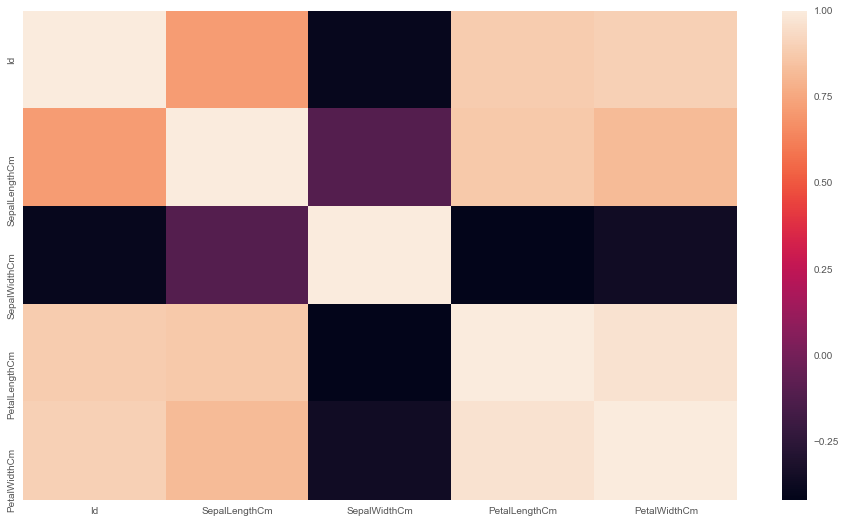

In [15]:
corr = dfIris.corr()
sns.heatmap(corr)

Looking at the heat map above, we see that PetalLength and PetalWidth seem to be highly correlated. We will go ahead and plan on using those for our algorithm.

Before implementing K means, we can also model the data using histograms, providing  a frequency distribution for the various attributes of the data set.

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


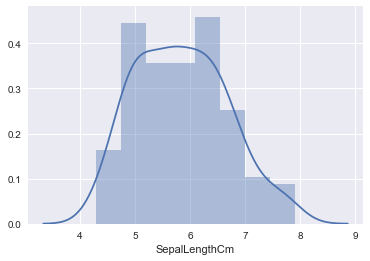

In [8]:
sns.distplot(dfIris.SepalLengthCm)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


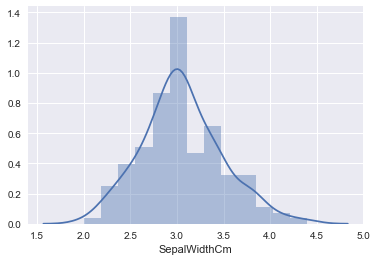

In [9]:
sns.distplot(dfIris.SepalWidthCm)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


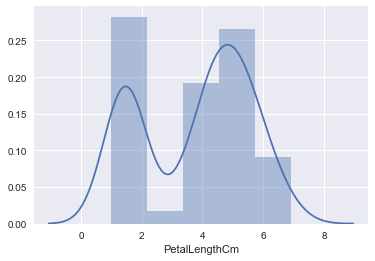

In [10]:
sns.distplot(dfIris.PetalLengthCm)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


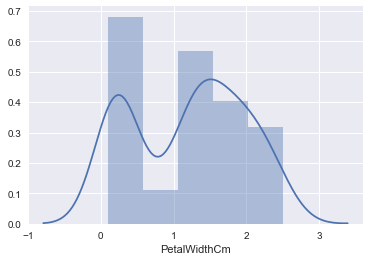

In [11]:
sns.distplot(dfIris.PetalWidthCm)

Now that we have have plotted the distributions of all the attributes, we will implement K means and run the algorithm to model the distribution.

The next dataset we will use looks at the various factors impacting the mpg of a car. To determine which attributes to use for our algorithm, we will do some basic feature engineering as above.

In [72]:
#reading in the data set to a panda dataframe
dfMPG = pd.read_csv('auto-mpg.csv')

In [74]:
dfMPG.head(3)
dfIris.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

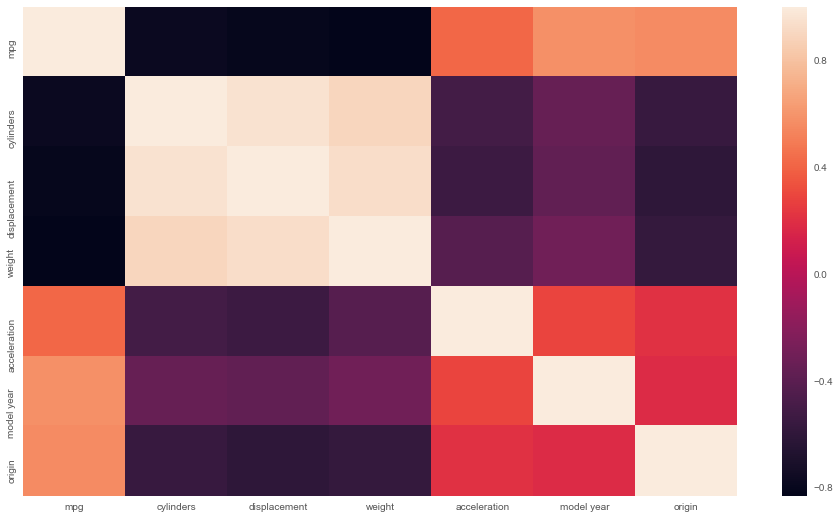

In [75]:
corr = dfIris.corr()
sns.heatmap(corr)

Based on the heat map, it seems that MPG and cylinders are highly correlated. To get a better sense of the distribution of these attributes, we can go ahead and plot histograms for both attributes.

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


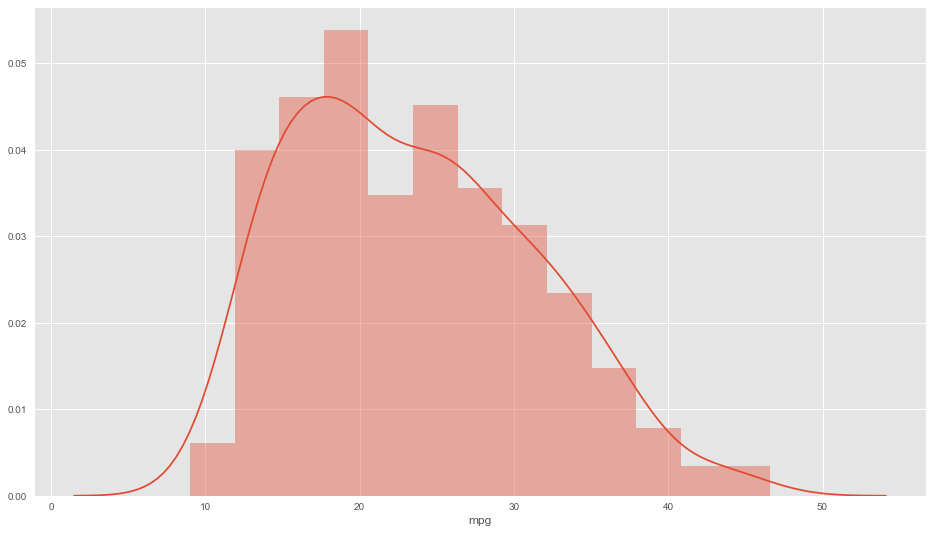

In [76]:
sns.distplot(dfMPG.mpg)

/Users/Vivek/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


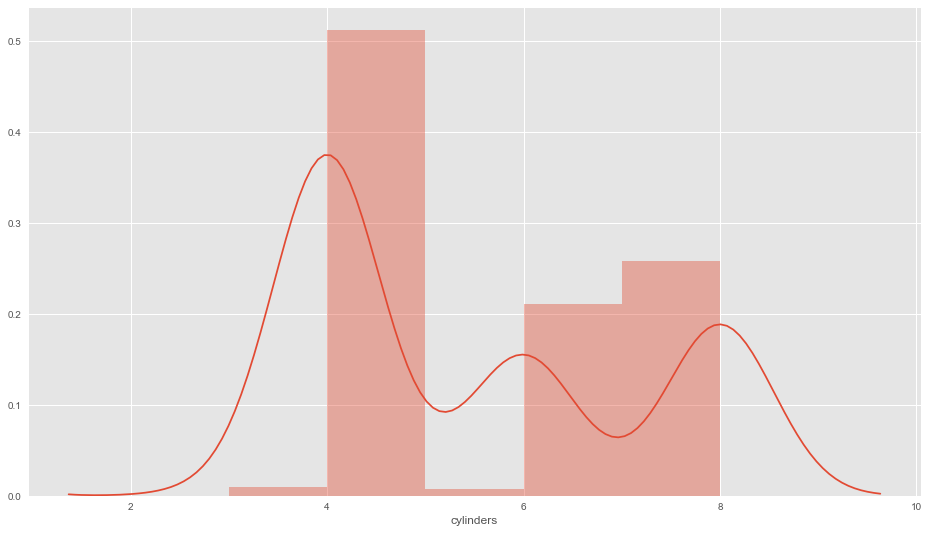

In [77]:
sns.distplot(dfMPG.cylinders)

The distribution shows us how many cylinders are possible, and gives us intuition on how many clusters we likely should use for the dataset. Most cars have either 4, 6, or 7 cylinders, so we will set N (number of clusters) to 3 for this algorithm